In [90]:
import io
import glob
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

### Figure 1

In [91]:
eng_file = r'C:\Users\Brottrager\Documents\Diss\reviews\metadata\ENG_texts_meta.csv'
ger_file = r'C:\Users\Brottrager\Documents\Diss\reviews\metadata\GER_texts_meta.csv'

In [92]:
eng_meta = pd.read_csv(eng_file, sep=';')
ger_meta = pd.read_csv(ger_file, sep=';')

In [93]:
years_covered = pd.DataFrame(range(1688, 1914))
years_covered= years_covered.rename(columns={0: 'year'})

In [94]:
eng_meta_pubyears = pd.DataFrame(eng_meta['pub_year'].value_counts())
eng_meta_pubyears.index.name = 'year'
eng_meta_pubyears.reset_index(inplace=True)
eng_meta_pubyears = eng_meta_pubyears.rename(columns={'pub_year': 'English Corpus'})

In [95]:
ger_meta_pubyears = pd.DataFrame(ger_meta['pub_year'].value_counts())
ger_meta_pubyears.index.name = 'year'
ger_meta_pubyears.reset_index(inplace=True)
ger_meta_pubyears= ger_meta_pubyears.rename(columns={'pub_year': 'German Corpus'})

In [96]:
meta_pubyears = pd.merge(eng_meta_pubyears, ger_meta_pubyears,
                        on='year',how='outer')
meta_pubyears = pd.merge(meta_pubyears, years_covered,
                        on = 'year',how='outer')

In [97]:
meta_pubyears = meta_pubyears.sort_values('year')

In [98]:
colors=['m','teal']

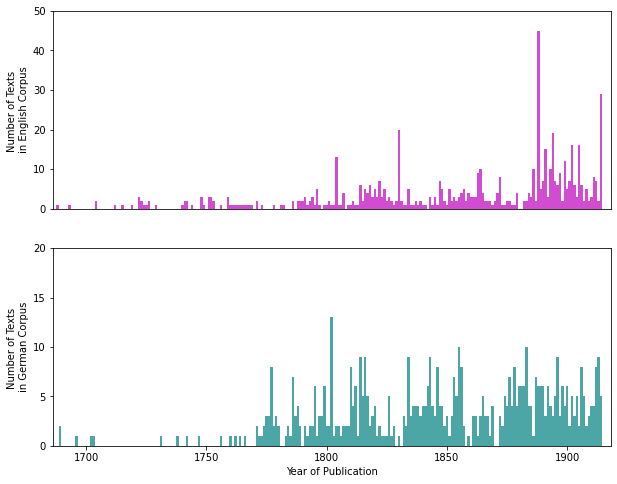

In [99]:
fig, axes = plt.subplots(2)
corpora = ['English Corpus','German Corpus']

i = 0
for corpus in corpora:
    ax = axes[i]
    ax.bar(meta_pubyears['year'], meta_pubyears[corpus], 
           color=colors[i], width=1, alpha=0.7)
    ax.set_ylabel('Number of Texts \nin ' + corpus)
    ax.set_xlabel('Year of Publication')
    if i == 0:
        ax.set_ylim([0,50.0])
    else:
        ax.set_ylim([0,20])
        plt.yticks(np.arange(0, 21, 5))
    ax.set_xlim([1686,1918])
    if i != len(corpora)-1:
        ax.get_xaxis().set_visible(False)
    i += 1
    
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.savefig(r'C:\Users\Brottrager\Documents\Diss\reviews\img\dist_corpora.png', dpi=600)

### Figure 2

In [100]:
eng_senti_file = r'C:\Users\Brottrager\Documents\Diss\reviews\results_sentiscores\220422_ENG_reviews_senti_classified.csv'
ger_senti_file = r'C:\Users\Brottrager\Documents\Diss\reviews\results_sentiscores\220422_GER_reviews_senti_classified.csv'

eng_senti = pd.read_csv(eng_senti_file, sep=';', index_col=0)
ger_senti = pd.read_csv(ger_senti_file, sep=';', index_col=0)

In [101]:
eng_reviews_meta = pd.merge(eng_meta, eng_senti, left_on='id', 
                            right_on='text_id', how='right')
ger_reviews_meta = pd.merge(ger_meta, ger_senti, left_on='id', 
                            right_on='text_id', how='right')

In [102]:
eng_reviews_pubyears = pd.DataFrame(eng_reviews_meta['pub_year'].value_counts())
eng_reviews_pubyears.index.name = 'year'
eng_reviews_pubyears.reset_index(inplace=True)
eng_reviews_pubyears = eng_reviews_pubyears.rename(columns={'pub_year': 'English Corpus'})

In [103]:
ger_reviews_pubyears = pd.DataFrame(ger_reviews_meta['pub_year'].value_counts())
ger_reviews_pubyears.index.name = 'year'
ger_reviews_pubyears.reset_index(inplace=True)
ger_reviews_pubyears = ger_reviews_pubyears.rename(columns={'pub_year': 'German Corpus'})

In [104]:
review_pubyears = pd.merge(eng_reviews_pubyears, ger_reviews_pubyears,
                           on='year',how='outer')
review_pubyears = pd.merge(review_pubyears, years_covered,
                           on = 'year',how='outer')

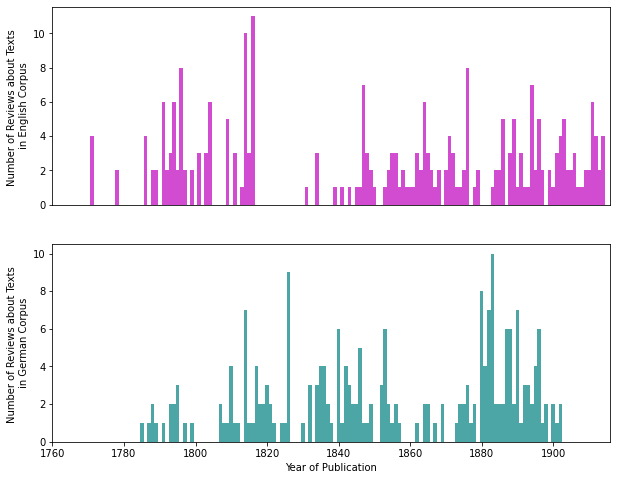

In [105]:
fig, axes = plt.subplots(2)
corpora = ['English Corpus','German Corpus']

i = 0
for corpus in corpora:
    ax = axes[i]
    ax.bar(review_pubyears['year'], review_pubyears[corpus], 
           color=colors[i], width=1, alpha=0.7)
    ax.set_ylabel('Number of Reviews about Texts \nin ' + corpus)
    ax.set_xlabel('Year of Publication')
    ax.set_xlim([1760,1916])
    if i != len(corpora)-1:
        ax.get_xaxis().set_visible(False)
    i += 1
    
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.savefig(r'C:\Users\Brottrager\Documents\Diss\reviews\img\dist_reviews.png', dpi=600)

#### Descriptive Statistics

In [106]:
eng_reviewed = list(set(eng_reviews_meta['text_id']))
ger_reviewed = list(set(ger_reviews_meta['text_id']))
eng_meta['reviewed'] = 0
ger_meta['reviewed'] = 0

In [107]:
eng_meta.loc[eng_meta.id.isin(eng_reviewed), 'reviewed'] = 1
ger_meta.loc[ger_meta.id.isin(ger_reviewed), 'reviewed'] = 1

In [108]:
eng_prop_reviewed = (100/len(eng_meta))*sum(eng_meta['reviewed'])
print(len(eng_reviews_meta['text_id']))
print(sum(eng_meta['reviewed']))
print(eng_prop_reviewed)

254
197
32.561983471074385


In [109]:
ger_prop_reviewed = (100/len(ger_meta))*sum(ger_meta['reviewed'])
print(len(ger_reviews_meta['text_id']))
print(sum(ger_meta['reviewed']))
print(ger_prop_reviewed)

222
176
32.17550274223035


In [110]:
eng_meta_reviewed = eng_meta.loc[eng_meta['reviewed'] == 1]
ger_meta_reviewed = ger_meta.loc[ger_meta['reviewed'] == 1]

In [111]:
eng_authors = list(set(eng_meta['author_viaf']))
ger_authors = list(set(ger_meta['author_viaf']))
eng_reviewed_authors = list(set(eng_meta_reviewed['author_viaf']))
ger_reviewed_authors = list(set(ger_meta_reviewed['author_viaf']))

In [112]:
eng_prop_reviewed_authors = (100/len(eng_authors))*len(eng_reviewed_authors)
print(len(eng_authors))
print(len(eng_reviewed_authors))
print(eng_prop_reviewed_authors)

168
92
54.76190476190476


In [113]:
ger_prop_reviewed_authors = (100/len(ger_authors))*len(ger_reviewed_authors)
print(len(ger_authors))
print(len(ger_reviewed_authors))
print(ger_prop_reviewed_authors)

184
79
42.93478260869565


### Figure 3

In [114]:
eng_libs_file = r'C:\Users\Brottrager\Documents\Diss\reviews\metadata\ENG_texts_circulating-libs.csv'
ger_libs_file = r'C:\Users\Brottrager\Documents\Diss\reviews\metadata\GER_texts_circulating-libs.csv'

eng_libs = pd.read_csv(eng_libs_file, sep=';')
ger_libs = pd.read_csv(ger_libs_file, sep=';')

In [115]:
eng_libs_pubyears = pd.DataFrame(eng_libs['pub_year'].value_counts())
eng_libs_pubyears.index.name = 'year'
eng_libs_pubyears.reset_index(inplace=True)
eng_libs_pubyears = eng_libs_pubyears.rename(columns={'pub_year': 'English Corpus'})

In [116]:
ger_libs_pubyears = pd.DataFrame(ger_libs['pub_year'].value_counts())
ger_libs_pubyears.index.name = 'year'
ger_libs_pubyears.reset_index(inplace=True)
ger_libs_pubyears = ger_libs_pubyears.rename(columns={'pub_year': 'German Corpus'})

In [117]:
libs_pubyears = pd.merge(eng_libs_pubyears, ger_libs_pubyears,
                           on='year',how='outer')
libs_pubyears = pd.merge(libs_pubyears, years_covered,
                           on = 'year',how='outer')

In [118]:
before1890 = libs_pubyears.loc[(libs_pubyears['year'] < 1890) & (libs_pubyears['year'] >= 1790)]
after1890 = libs_pubyears.loc[libs_pubyears['year'] >= 1890]

In [119]:
np.nansum(before1890['English Corpus'])/len(before1890)

3.37

In [120]:
np.nansum(after1890['English Corpus'])/len(after1890)

7.961538461538462

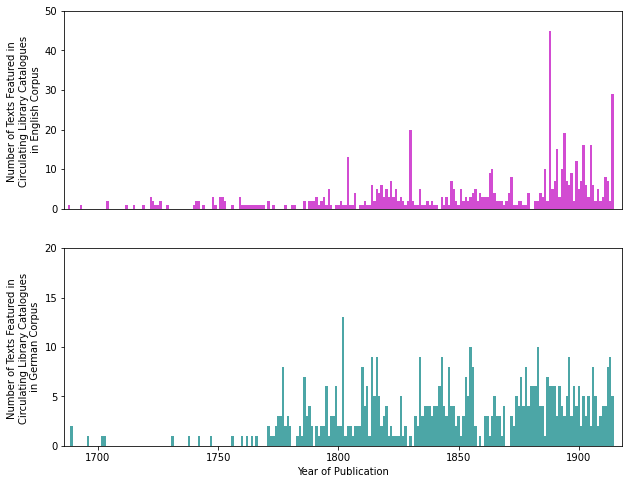

In [121]:
fig, axes = plt.subplots(2)
corpora = ['English Corpus','German Corpus']

i = 0
for corpus in corpora:
    ax = axes[i]
    ax.bar(libs_pubyears['year'], libs_pubyears[corpus], 
           color=colors[i], width=1, alpha=0.7)
    ax.set_ylabel('Number of Texts Featured in \nCirculating Library Catalogues \nin ' + corpus)
    ax.set_xlabel('Year of Publication')
    ax.set_xlim([1686,1918])
    if i == 0:
        ax.set_ylim([0,50.0])
    else:
        ax.set_ylim([0,20]) 
        plt.yticks(np.arange(0, 21, 5))
    if i != len(corpora)-1:
        ax.get_xaxis().set_visible(False)
    i += 1
    
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.savefig(r'C:\Users\Brottrager\Documents\Diss\reviews\img\dist_circlibs.png', dpi=600)

#### Descriptive Statistics

In [122]:
eng_with_entries = eng_libs.loc[eng_libs['binary'] == 1]
ger_with_entries = ger_libs.loc[ger_libs['binary'] == 1]

In [123]:
eng_prop_entries = (100/len(eng_libs))*len(eng_with_entries)
print(len(eng_libs))
print(len(eng_with_entries))
print(eng_prop_entries)

605
457
75.53719008264463


In [124]:
ger_prop_entries = (100/len(ger_libs))*len(ger_with_entries)
print(len(ger_libs))
print(len(ger_with_entries))
print(ger_prop_entries)

547
306
55.94149908592322


In [125]:
eng_entries_authors = list(set(eng_with_entries['author_viaf']))
ger_entries_authors = list(set(ger_with_entries['author_viaf']))

In [126]:
eng_prop_entries_authors = (100/len(eng_authors))*len(eng_entries_authors)
print(len(eng_authors))
print(len(eng_entries_authors))
print(eng_prop_entries_authors)

168
132
78.57142857142857


In [127]:
ger_prop_entries_authors = (100/len(ger_authors))*len(ger_entries_authors)
print(len(ger_authors))
print(len(ger_entries_authors))
print(ger_prop_entries_authors)

184
100
54.347826086956516


### Figure 4

In [143]:
eng_senti = eng_senti[['sentiment','journal','text_id',
                       'sentiscore_average','sentiment_Textblob']]
eng_senti = eng_senti.sort_values('sentiment')
ger_senti = ger_senti[['sentiment','journal','text_id',
                       'sentiscore_average','sentiment_Textblob']]
ger_senti = ger_senti.sort_values('sentiment')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

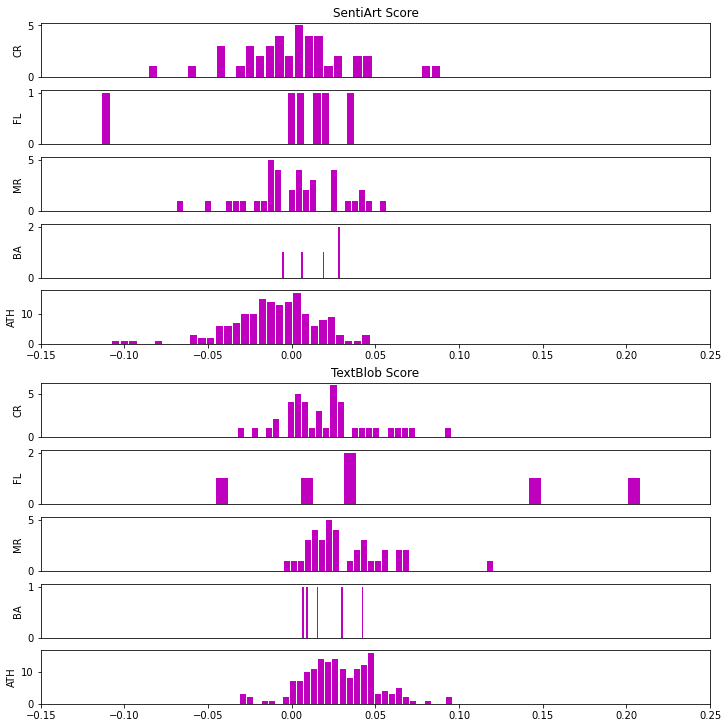

In [182]:
fig, axes = plt.subplots(10, constrained_layout=True)
journals = list(set(eng_senti['journal']))
variants = ['sentiscore_average','sentiment_Textblob']

i = 0
for var in variant:
    if var == 'sentiscore_average':
        label = 'SentiArt Score'
    else:
        label = "TextBlob Score"
    for journal in journals:
        data = eng_senti[eng_senti['journal'] == journal]
        ax = axes[i]
        ax.hist(x=data[var], bins=30, color='m',
                alpha=1, rwidth=0.85)
        ax.set_ylabel(journal)
        ax.set_xlim([-0.15, 0.25])
        if i != 4 and i != 9:
            ax.get_xaxis().set_visible(False)
        if i == 0 or i == 5:
            ax.set_title(label)
        leg = ax.legend(loc='upper left')
        leg.draw_frame(False)
        i += 1

fig = plt.gcf()
fig.set_size_inches(10, 10)
fig.savefig(r'C:\Users\Brottrager\Documents\Diss\reviews\img\ENG_comp.png', dpi=600)

### Figure 5

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

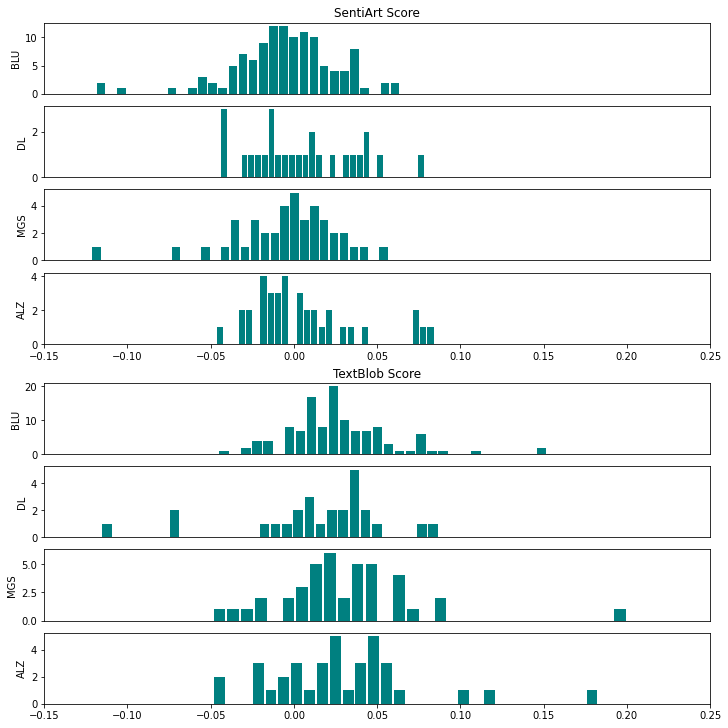

In [183]:
fig, axes = plt.subplots(8, constrained_layout=True)
journals = list(set(ger_senti['journal']))
variants = ['sentiscore_average','sentiment_Textblob']

i = 0
for var in variant:
    if var == 'sentiscore_average':
        label = 'SentiArt Score'
    else:
        label = "TextBlob Score"
    for journal in journals:
        data = ger_senti[ger_senti['journal'] == journal]
        ax = axes[i]
        ax.hist(x=data[var], bins=30, color='teal',
                alpha=1, rwidth=0.85)
        ax.set_ylabel(journal)
        ax.set_xlim([-0.15, 0.25])
        if i != 3 and i != 7:
            ax.get_xaxis().set_visible(False)
        if i == 0 or i == 4:
            ax.set_title(label)
        leg = ax.legend(loc='upper left')
        leg.draw_frame(False)
        i += 1

fig = plt.gcf()
fig.set_size_inches(10, 10)
fig.savefig(r'C:\Users\Brottrager\Documents\Diss\reviews\img\GER_comp.png', dpi=600)

### Figure 6

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


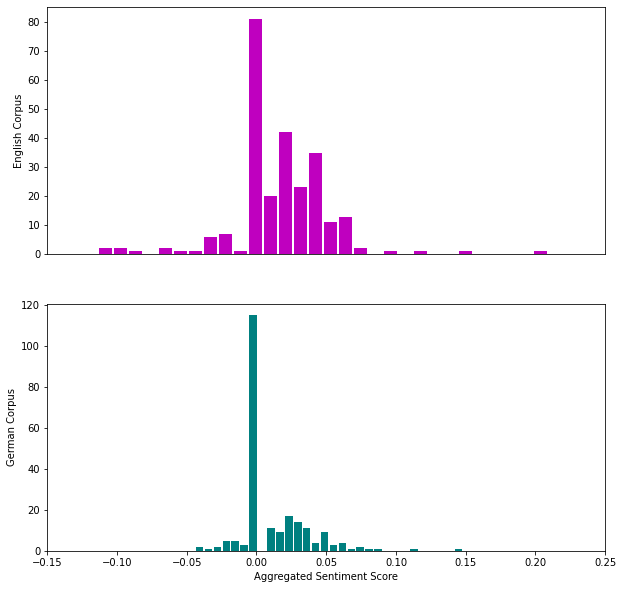

In [184]:
fig, axes = plt.subplots(2)
senti = [eng_senti, ger_senti]
corpora = ['English Corpus','German Corpus']
colors = ['m','teal']

i = 0
for s in senti:
    data = s
    ax = axes[i]
    ax.hist(x=data['sentiment'], bins=30, color=colors[i],
            alpha=1, rwidth=0.85)
    #ax.hist(x=data['sentiscore_average'], bins=30, color='slategrey',
    #    alpha=0.5, rwidth=0.85)
    #ax.hist(x=data['sentiment_Textblob'], bins=30, color='lightsteelblue',
    #        alpha=0.5, rwidth=0.85)
    ax.set_xlabel('Aggregated Sentiment Score')
    ax.set_ylabel(corpora[i])
    ax.set_xlim([-0.15, 0.25])
    ax.set_xlim([-0.15, 0.25])
    if i != len(corpora)-1:
        ax.get_xaxis().set_visible(False)
    leg = ax.legend(loc='upper left')
    leg.draw_frame(False)
    i += 1
    
fig = plt.gcf()
fig.set_size_inches(10, 10)
fig.savefig(r'C:\Users\Brottrager\Documents\Diss\reviews\img\dist_aggregated_sentiment_scores.png', dpi=600)